In [2]:
#import necessary libaries
#libaries for data wrangling
import pandas as pd
import numpy as np

# libaries for data cleaning
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)





## Data Ingestion

In [3]:
import kagglehub
path = kagglehub.dataset_download("utkarshx27/crimes-2001-to-present")
print("path to dataset files:", path)

path to dataset files: C:\Users\ncc\.cache\kagglehub\datasets\utkarshx27\crimes-2001-to-present\versions\1


In [ ]:
df = pd.read_csv("C:/Users/ncc/.cache/kagglehub/datasets/utkarshx27/crimes-2001-to-present/versions/1/Crimes_-_2001_to_Present.csv")
df.head(5)

In [ ]:
#convert the column to date to enable time series analysis on it.
#extract possible information from the column
df["Date"] = pd.to_datetime(df["Date"])

# Extract date components
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour
df["Day_of_Week"] = df["Date"].dt.dayofweek
df["Day_name"] = df["Date"].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]) 


In [ ]:
df_subset = df[df["Year"] == 2015]
df_subset

## Preliminary Data Analysis

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
print("==== Dataset Overview====")
print("Dataset shape:",df_subset.shape)
print(f"Memory Usage: {df_subset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColunm information")
print(f"List of colunms: {df_subset.columns}")







==== Dataset Overview====
Dataset shape: (7784664, 22)
Memory Usage: 5302.92 MB

Colunm information
List of colunms: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')


In [ ]:
print("\n=== BASIC STATISTICS ===")
print(df_subset.describe(include='all'))
print("\n=== BASIC STATISTICS For Numerical Colunms===")
print(df_subset.describe())


=== BASIC STATISTICS ===
                  ID Case Number                    Date             Block     IUCR Primary Type Description Location Description   Arrest Domestic          Beat      District          Ward  Community Area FBI Code  X Coordinate  Y Coordinate          Year              Updated On      Latitude     Longitude                       Location
count   7.784664e+06     7784660                 7784664           7784664  7784664      7784664     7784664              7774283  7784664  7784664  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7784664  7.697816e+06  7.697816e+06  7.784664e+06                 7784664  7.697816e+06  7.697816e+06                        7697816
unique           NaN     7784121                 3207478             62845      404           36         544                  215        2        2           NaN           NaN           NaN             NaN       26           NaN           NaN           NaN                    5561           NaN

## Data Cleaning

In [ ]:
df_subset.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [ ]:
df_subset.dropna(inplace=True)

In [ ]:
df_subset.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [ ]:
df_subset.duplicated().sum()

np.int64(0)

In [ ]:
df_subset.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_name,Month_Name,Quarter,Is_Weekend
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True


NameError: name 'df' is not defined

In [ ]:
df_crime = df_subset["Primary Type"].value_counts()

Primary Type
THEFT                                1499197
BATTERY                              1299859
CRIMINAL DAMAGE                       811905
NARCOTICS                             669097
ASSAULT                               465810
OTHER OFFENSE                         440288
BURGLARY                              390418
MOTOR VEHICLE THEFT                   339630
DECEPTIVE PRACTICE                    302833
ROBBERY                               267994
CRIMINAL TRESPASS                     195986
WEAPONS VIOLATION                     100385
PROSTITUTION                           61348
OFFENSE INVOLVING CHILDREN             49456
PUBLIC PEACE VIOLATION                 48705
SEX OFFENSE                            26311
CRIM SEXUAL ASSAULT                    24123
INTERFERENCE WITH PUBLIC OFFICER       17821
GAMBLING                               13405
LIQUOR LAW VIOLATION                   12782
HOMICIDE                               12168
ARSON                                  118

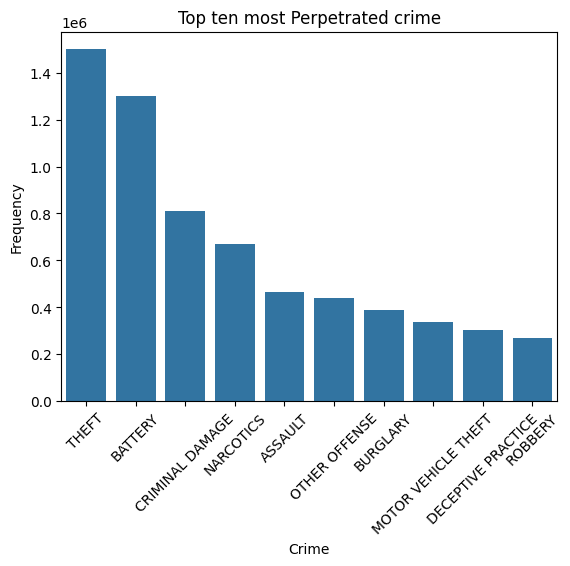

In [ ]:
df_crime = df_subset["Primary Type"].value_counts().sort_values(ascending=False).head(10)
sns.barplot(df_crime)
plt.xlabel("Crime")
plt.ylabel("Frequency")
plt.title("Top ten most Perpetrated crime")
plt.xticks(rotation=45)
plt.show()


In [35]:
!pip install geopy



   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   -------------------- ---------------

In [36]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [38]:
geolocator = Nominatim(user_agent="my_geopy_app")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
df['location_info'] = df.apply(lambda row: geocode(f"{row['Latitude']}, {row['Longitude']}"), axis=1)